In [3]:
#Importar librerias necesarias
#%pip install funpymodeling
#from funpymodeling.exploratory import freq_tbl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Carga desde un archivo .csv sin indice y eliminar filas innecesarias
Madrid=pd.read_csv("Listings Final-Madrid.csv")
Madrid.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1104967621421098322,https://www.airbnb.com/rooms/1104967621421098322,20240615011404,2024-06-15,city scrape,"Habitación de lujo, baño privado",NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,565307927,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.61
1,930941073152690361,https://www.airbnb.com/rooms/930941073152690361,20240615011404,2024-06-15,city scrape,habitación para pareja,Rent room for loose nights or weekends to a c...,NaN,https://a0.muscache.com/pictures/85f0b383-e8f8...,442944608,...,5.00,4.67,5.00,NaN,f,2,0,2,0,0.28
2,51647382,https://www.airbnb.com/rooms/51647382,20240615011404,2024-06-15,city scrape,Buenos Aires en Madrid,"This special place is close to everything, mak...",The neighborhood is m,https://a0.muscache.com/pictures/db018af4-f622...,252336445,...,4.83,4.51,4.61,NaN,t,2,0,2,0,5.40
3,1026072412626070839,https://www.airbnb.com/rooms/1026072412626070839,20240615011404,2024-06-15,city scrape,Habitación Madrid Rio!,Enjoy the simplicity of this quiet and central...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,545435841,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.14
4,766423030884644417,https://www.airbnb.com/rooms/766423030884644417,20240615011404,2024-06-15,city scrape,habitación para turista,Enjoy a stylish experience at this centrally-l...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3882456,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


In [13]:
#Identificar valores nulos por columna
# Ajustar maximo de filas
Valores_Nulos=Madrid.isnull().sum()
Columnas_Con_Nulos = Valores_Nulos[Valores_Nulos > 0]
Columnas_Con_Nulos

,0
description,966
neighborhood_overview,13618
picture_url,2
host_name,4
host_since,4
host_location,8416
host_about,13945
host_response_time,4915
host_response_rate,4915
host_acceptance_rate,4017


In [11]:
#Columnas de tipo object
Tipos_Columnas = Madrid[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'object']
Columnas_Object

,0
description,object
neighborhood_overview,object
picture_url,object
host_name,object
host_since,object
host_location,object
host_about,object
host_response_time,object
host_response_rate,object
host_acceptance_rate,object


In [10]:
#Información tipos de columnas
Tipos_Columnas = Madrid[Columnas_Con_Nulos.index].dtypes
Columnas_float = Tipos_Columnas[Tipos_Columnas == 'float']
Columnas_float

,0
host_listings_count,float64
host_total_listings_count,float64
bathrooms,float64
bedrooms,float64
beds,float64
calendar_updated,float64
review_scores_rating,float64
review_scores_accuracy,float64
review_scores_cleanliness,float64
review_scores_checkin,float64


In [14]:
copia_Madrid = Madrid.copy()
copia_Madrid["description"] = copia_Madrid["description"].fillna("DESCRIPCIÓN FALTANTE")
copia_Madrid["neighborhood_overview"] = copia_Madrid["neighborhood_overview"].fillna("SIN INFORMACIÓN")
copia_Madrid["picture_url"] = copia_Madrid["picture_url"].fillna("SIN IMAGEN")
copia_Madrid["host_name"] = copia_Madrid["host_name"].fillna("ANONIMO")
copia_Madrid["host_since"] = copia_Madrid["host_since"].fillna("SIN FECHA")
copia_Madrid["host_location"] = copia_Madrid["host_location"].fillna("SIN INFORMACIÓN")
copia_Madrid["host_about"] = copia_Madrid["host_about"].fillna("SIN INFORMACIÓN")
copia_Madrid["host_response_time"] = copia_Madrid["host_response_time"].fillna("SIN INFORMACIÓN")
copia_Madrid["host_response_rate"] = copia_Madrid["host_response_rate"].fillna("SIN INFORMACIÓN")
copia_Madrid["host_acceptance_rate"] = copia_Madrid["host_acceptance_rate"].fillna("SIN INFORMACIÓN")
copia_Madrid["host_is_superhost"] = copia_Madrid["host_is_superhost"].fillna("VALIDACIÓN PENDIENTE")
copia_Madrid["host_thumbnail_url"] = copia_Madrid["host_thumbnail_url"].fillna("MINIATURA NO DISPONIBLE")
copia_Madrid["host_picture_url"] = copia_Madrid["host_picture_url"].fillna("SIN IMAGEN")
copia_Madrid["host_neighbourhood"] = copia_Madrid["host_neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Madrid["host_verifications"] = copia_Madrid["host_verifications"].fillna("VALIDACIÓN PENDIENTE")
copia_Madrid["host_has_profile_pic"] = copia_Madrid["host_has_profile_pic"].fillna("INFORMACIÓN FALTANTE")
copia_Madrid["host_identity_verified"] = copia_Madrid["host_identity_verified"].fillna("INFORMACIÓN FALTANTE")
copia_Madrid["neighbourhood"] = copia_Madrid["neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Madrid["bathrooms_text"] = copia_Madrid["bathrooms_text"].fillna("SIN INFORMACIÓN")
copia_Madrid["has_availability"] = copia_Madrid["has_availability"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Madrid["first_review"] = copia_Madrid["first_review"].fillna("SIN RESEÑA")
copia_Madrid["last_review"] = copia_Madrid["last_review"].fillna("SIN RESEÑA")
copia_Madrid["license"] = copia_Madrid["license"].fillna("SIN LICENCIA")

In [26]:
copia_Madrid["review_scores_rating"]=copia_Madrid["review_scores_rating"].fillna(round(copia_Madrid ['review_scores_rating'].mean(),1))
copia_Madrid["review_scores_accuracy"]=copia_Madrid["review_scores_accuracy"].fillna(round(copia_Madrid ['review_scores_accuracy'].mean(),1))
copia_Madrid["review_scores_cleanliness"]=copia_Madrid["review_scores_cleanliness"].fillna(round(copia_Madrid ['review_scores_cleanliness'].mean(),1))
copia_Madrid["review_scores_checkin"]=copia_Madrid["review_scores_checkin"].fillna(round(copia_Madrid ['review_scores_checkin'].mean(),1))
copia_Madrid["review_scores_communication"]=copia_Madrid["review_scores_communication"].fillna(round(copia_Madrid ['review_scores_communication'].mean(),1))
copia_Madrid["review_scores_location"]=copia_Madrid["review_scores_location"].fillna(round(copia_Madrid ['review_scores_location'].mean(),1))
copia_Madrid["review_scores_value"]=copia_Madrid["review_scores_value"].fillna(round(copia_Madrid ['review_scores_value'].mean(),1))
copia_Madrid["reviews_per_month"]=copia_Madrid["reviews_per_month"].fillna(round(copia_Madrid ['reviews_per_month'].mean(),1))
copia_Madrid["host_listings_count"]=copia_Madrid["host_listings_count"].fillna(round(copia_Madrid ['host_listings_count'].mean(),1))
copia_Madrid["host_total_listings_count"]=copia_Madrid["host_total_listings_count"].fillna(round(copia_Madrid ['host_total_listings_count'].mean(),1))
copia_Madrid["bathrooms"]=copia_Madrid["bathrooms"].fillna(round(copia_Madrid ['bathrooms'].mean(),1))
copia_Madrid["beds"]=copia_Madrid["beds"].fillna(round(copia_Madrid ['beds'].mean(),1))
copia_Madrid["bedrooms"]=copia_Madrid["bedrooms"].fillna(round(copia_Madrid ['bedrooms'].mean(),1))
copia_Madrid["calendar_updated"]=copia_Madrid["calendar_updated"].fillna("-")

In [23]:
copia_Madrid['price'] = copia_Madrid['price'].str.replace(r'[\$,]', '', regex=True).astype(float)


AttributeError: Can only use .str accessor with string values!

In [24]:
copia_Madrid["price"]=copia_Madrid["price"].fillna(round(copia_Madrid ['price'].mean(),1))

In [27]:
copia_Madrid.isnull().sum()
Valores_Nulos2=copia_Madrid.isnull().sum()
Columnas_Con_Nulos2 = Valores_Nulos2[Valores_Nulos2 > 0]
Columnas_Con_Nulos2

,0


ELIMINAR OUTLIERS

In [29]:
#Separar por columnas cualitativas y cuantitativas
columnas_cualitativas = copia_Madrid.select_dtypes(include = 'object')
columnas_cuantitativas = copia_Madrid.select_dtypes(include = ['int64', 'float64'])

<Figure size 2000x1000 with 0 Axes>

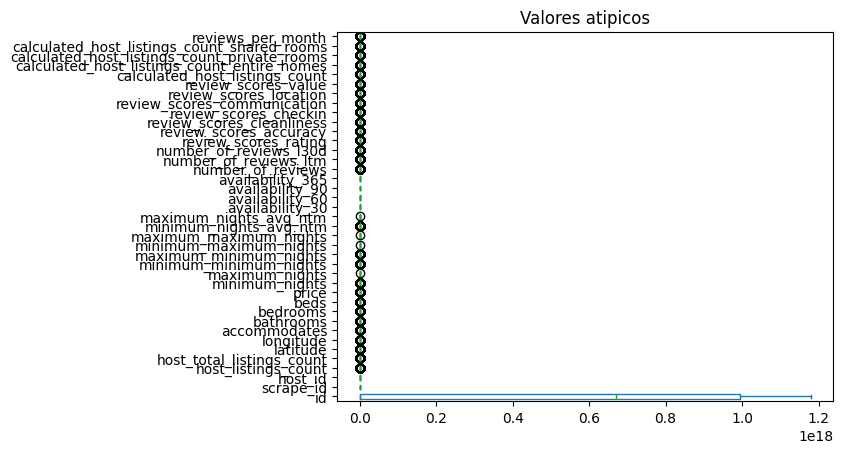

In [30]:
#Hacer un boxplot de valores atipicos de las columnas cuantitativas
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [31]:
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido id                                              1.977067e+18
scrape_id                                       2.024062e+13
host_id                                         8.238683e+08
host_listings_count                             3.558720e+02
host_total_listings_count                       4.934873e+02
latitude                                        4.049231e+01
longitude                                      -3.610648e+00
accommodates                                    8.873245e+00
bathrooms                                       3.074978e+00
bedrooms                                        4.225072e+00
beds                                            6.008475e+00
price                                           9.414253e+02
minimum_nights                                  9.978497e+01
maximum_nights                                  1.871980e+03
minimum_minimum_nights                          8.998350e+01
maximum_minimum_nights                          1.424768e+0

In [32]:
#Filtrar solo por columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]

In [33]:
#Revisar valores nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

,0
id,0
scrape_id,0
host_id,0
host_listings_count,406
host_total_listings_count,400
latitude,324
longitude,647
accommodates,377
bathrooms,307
bedrooms,271


In [34]:
#Hacer una copia del dataframe y rellenar los valores nulos con la media
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))

In [35]:
#Se juntan las columnas cualitativas con las cuantitativas
Madrid_outliers = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
Madrid_outliers.head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,room_type,bathrooms_text,amenities,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,1104967621421098322,20240615011404,565307927,1.0,1.0,40.406980,-3.675015,2.0,1.0,1.0,...,Private room,1 bath,[],-,t,2024-06-15,2024-03-10,2024-05-08,SIN LICENCIA,f
1,930941073152690361,20240615011404,442944608,2.0,4.0,40.392100,-3.670030,2.0,1.0,1.0,...,Private room,1 bath,"[""Wifi""]",-,t,2024-06-15,2023-07-29,2023-10-04,SIN LICENCIA,f
2,51647382,20240615011404,252336445,2.0,2.0,40.395110,-3.671430,1.0,1.0,2.0,...,Private room,1 shared bath,"[""Outdoor dining area"", ""TV"", ""Free parking on...",-,t,2024-06-15,2021-08-17,2024-05-29,SIN LICENCIA,t
3,1026072412626070839,20240615011404,545435841,1.0,1.0,40.395555,-3.716437,3.0,1.0,1.0,...,Private room,1 shared bath,"[""Lock on bedroom door"", ""Wifi"", ""Kitchen""]",-,t,2024-06-15,2023-11-20,2023-11-20,SIN LICENCIA,f
4,766423030884644417,20240615011404,3882456,2.0,4.0,40.430450,-3.672100,1.0,1.0,1.0,...,Private room,1 shared bath,"[""Washer"", ""Lock on bedroom door"", ""Air condit...",-,t,2024-06-15,SIN RESEÑA,SIN RESEÑA,SIN LICENCIA,f


In [36]:
#Comprobamos que no existan valores nulos
valores_nulos_Madrid_outliers = Madrid_outliers.isnull().sum()
valores_nulos_Madrid_outliers

,0
id,0
scrape_id,0
host_id,0
host_listings_count,0
host_total_listings_count,0
...,...
calendar_last_scraped,0
first_review,0
last_review,0
license,0


In [37]:
Madrid_outliers.to_csv("MADRID_LIMPIO.csv")
from google.colab import files


files.download("MADRID_LIMPIO.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>